### Дисклеймер

Для работы с изображениями и получения их гистограмм — характеристик распределения интенсивности изображения, можно воспользоваться следующей функцией и библиотекой *cv2*:

In [127]:
import cv2

def extract_histogram(imagePath, bins=(8, 8, 8)):
    image = cv2.imread(imagePath)
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

В задачах используйте реализацию метода опорных векторов из библиотеки *sklearn*:  

In [128]:
from sklearn.svm import LinearSVC

При считывании набора данных (картинок) из папки для построения гистограмме отсортируйте названия по алфавиту, например, так (иначе тренировочные наборы данных могут отличаться даже при фиксированном random_seed):  
*imagePaths = sorted(list(paths.list_images('train')))*

### Задание

В данной задаче вам предстоит решить задачу классификации изображений – отделить изображения кошек от изображений собак, используя классификацию с мягким зазором и параметром $C$.  
  
В архиве *train_task.zip* находится выборка, включающая в себя изображения кошек и собак (по 500 изображений). Имя каждого изображения, для удобства, имеет следующий формат:  *cat/dog.номер_изображения.jpg*  в зависимости от того, какое животное присутствует на изображении. Данная выборка используется для обучения классификатора и оценки классификатора.  
  
Следующая выборка *test_task.zip* предназначена для классификации новых объектов после построения классификатора.

Обучите классификатор *LinearSVC()* при $C = 1.28$ и *random_state = 13* на предложенной выборке. Используйте параметр *random_state = 13* для разделения выборки на тренировочную и тестовую части, в отношении $75/25$ функции *train_test_split()*.

In [129]:
# formation of arrays of features(trainImagesData) and responses(trainY) of the train 
# class "dog" 1
# class "cat" 0

from imutils import paths
import numpy as np

trainImagesPaths = sorted(list(paths.list_images("drive/MyDrive/data/train_data")))
trainImagesData = []
trainY = []

for i in range(len(trainImagesPaths)):
    trainImagesData.append(np.array(extract_histogram(trainImagesPaths[i])))

    if (trainImagesPaths[i].find("cat") == -1):
        trainY.append(1)
    else:
      trainY.append(0)

In [130]:
# split the train data

from sklearn.model_selection import train_test_split

trainTrainX, trainTestX, trainTrainY, trainTestY = train_test_split(trainImagesData, trainY, random_state = 13, test_size = 0.25)

In [131]:
# create and fit the classifier

svc = LinearSVC(C = 1.28, random_state = 13)
svc.fit(trainTrainX, trainTrainY)

LinearSVC(C=1.28, random_state=13)

Выведите значение коэффициента $ϴ_0$ построенной гиперплоскости.

In [132]:
print(round(svc.intercept_[0], 2))

-0.13


Выведите значения коэффициентов $ϴ_{33}$, $ϴ_{334}$ построенной гиперплоскости.

In [133]:
print(round(svc.coef_[0][32], 2))
print(round(svc.coef_[0][333], 2))

-0.0
-0.0


Составьте матрицу ошибок для каждого класса, рассчитайте точность (precision) и полноту (recall). Затем вычислите значение метрики $F_1$ для каждого класса:

In [134]:
yPred = svc.predict(trainTestX)

from sklearn.metrics import f1_score

print(round(f1_score(trainTestY, yPred, average='macro'), 2))

0.59


Выполните предсказание для изображений, указанных ниже. Введите назначенный класс: 0 или 1.

Файл cat.1043.jpg  
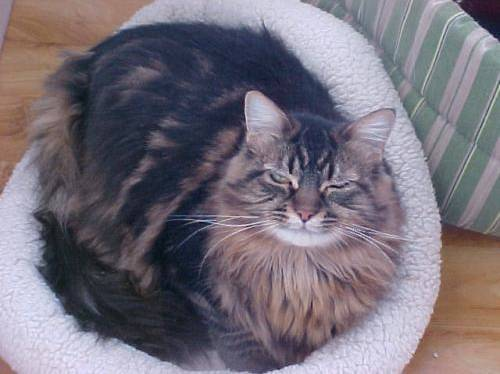

In [135]:
cat1043 = extract_histogram("drive/MyDrive/data/test_data/cat.1043.jpg").reshape(1, -1)
print(svc.predict(cat1043)[0])

1


Файл cat.1037.jpg  
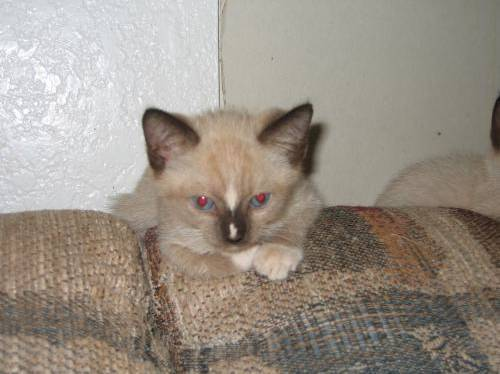

In [136]:
cat1037 = extract_histogram("drive/MyDrive/data/test_data/cat.1037.jpg").reshape(1, -1)
print(svc.predict(cat1037)[0])

0


Файл dog.1012.jpg  
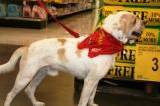

In [137]:
dog1012 = extract_histogram("drive/MyDrive/data/test_data/dog.1012.jpg").reshape(1, -1)
print(svc.predict(dog1012)[0])

1


Файл dog.1033.jpg  
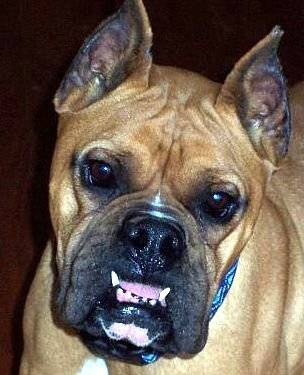

In [138]:
dog1033 = extract_histogram("drive/MyDrive/data/test_data/dog.1033.jpg").reshape(1, -1)
print(svc.predict(dog1033)[0])

1
